In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA

                     counts  speed  std    link
2015-01-02 00:00:00     NaN    NaN  NaN  123007
2015-01-02 00:05:00     0.0    NaN  NaN  123007
2015-01-02 00:10:00     0.0    NaN  NaN  123007
2015-01-02 00:15:00     0.0    NaN  NaN  123007
2015-01-02 00:20:00     0.0    NaN  NaN  123007


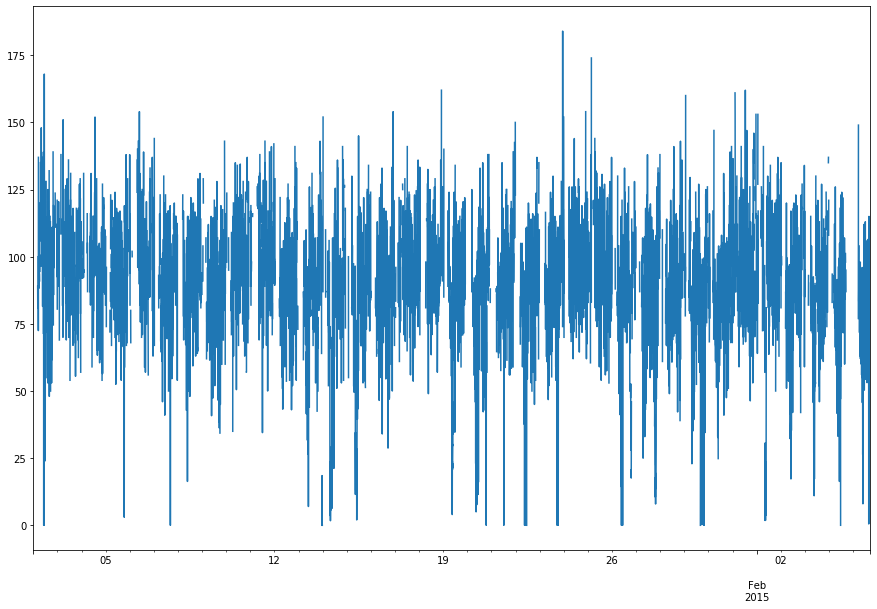

In [2]:
#Reading .csv file(Floating car data) which is raw data and its plot.

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


df = pd.read_csv('F:/PROVA FINALE/FCD_aggregated_10k.csv',header = 0, index_col=0, parse_dates=[0], date_parser=parser)
print(df.head())

plt.figure(figsize=(15,10))
df['speed'].plot()

In [3]:
#Preprocessing the data

#condition1 -- if counts equal to zero then the speed and the std must be zero or null.
check = df.loc[df.counts == 0.0, ['speed', 'std']]
print(check)

print(check.isnull().sum())

#condition2 -- if counts equal to one then the speed must be zero or null and and the std must be zero or null.
check1 = df.loc[df.counts == 1, ['speed', 'std']]
print(check1)

print(check1.isnull().sum())

#condition3 -- if counts equal to greater than one then the speed and the std must not be zero or null.
check2 = df.loc[df.counts > 1, ['speed', 'std']]
print(check2)

print(check2.isnull().sum())

                     speed  std
2015-01-02 00:05:00    NaN  NaN
2015-01-02 00:10:00    NaN  NaN
2015-01-02 00:15:00    NaN  NaN
2015-01-02 00:20:00    NaN  NaN
2015-01-02 00:25:00    NaN  NaN
...                    ...  ...
2015-02-05 11:20:00    NaN  NaN
2015-02-05 11:30:00    NaN  NaN
2015-02-05 13:15:00    NaN  NaN
2015-02-05 16:20:00    NaN  NaN
2015-02-05 16:45:00    NaN  NaN

[3716 rows x 2 columns]
speed    3716
std      3716
dtype: int64
                     speed  std
2015-01-02 01:10:00  107.0  NaN
2015-01-02 01:40:00   91.0  NaN
2015-01-02 03:35:00   87.0  NaN
2015-01-02 04:00:00  144.0  NaN
2015-01-02 04:20:00   89.0  NaN
...                    ...  ...
2015-02-05 15:10:00   94.0  NaN
2015-02-05 15:50:00  115.0  NaN
2015-02-05 16:00:00   83.0  NaN
2015-02-05 16:40:00   86.0  NaN
2015-02-05 17:05:00   93.0  NaN

[2286 rows x 2 columns]
speed       0
std      2286
dtype: int64
                          speed        std
2015-01-02 02:35:00   90.000000   7.071068
2015-01-02 05:

In [4]:
#Preprocessed data
#From the above checks we can simply fill Nan values with zero
df1 = df.fillna(0)
print(df1.head())

print(df1.shape)

df2 = df1['speed']

                     counts  speed  std    link
2015-01-02 00:00:00     0.0    0.0  0.0  123007
2015-01-02 00:05:00     0.0    0.0  0.0  123007
2015-01-02 00:10:00     0.0    0.0  0.0  123007
2015-01-02 00:15:00     0.0    0.0  0.0  123007
2015-01-02 00:20:00     0.0    0.0  0.0  123007
(9999, 4)


In [6]:
#Splitting data into 5min,10min,15min,30min,1hour,day


ten = df2.rolling(window = 2).mean()
fifteen = df2.rolling(window = 3).mean()
half = df2.rolling(window = 6).mean()
df2_mean = df2.rolling(window = 12).mean()
df2_mean_daily = df2.rolling(window = 288).mean()

In [11]:
fcd = ten.fillna(0)

fcd.index = fcd.index.to_period('M')
# Fitting the ARIMA model
model = ARIMA(fcd, order=(2,1,0))
model_fit = model.fit()

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.speed   No. Observations:                 9998
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -46444.333
Method:                       css-mle   S.D. of innovations             25.189
Date:                Fri, 09 Apr 2021   AIC                          92896.667
Time:                        13:08:02   BIC                          92925.507
Sample:                    01-31-2015   HQIC                         92906.429
                         - 02-28-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0086      0.169      0.051      0.960      -0.323       0.340
ar.L1.D.speed     0.0216      0.009      2.515      0.012       0.005       0.038
ar.L2.D.speed    -0.5112      0.009    -

In [13]:
# Creating train and test data

X = fcd.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# validatin of data
for t in range(len(test)):
  model = ARIMA(history, order=(2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  ciao = output[0]
  predictions.append(ciao)
  prego = test[t]
  history.append(prego)
  print('predicted=%f, expected=%f' % (ciao, prego))


predicted=25.050235, expected=0.000000
predicted=-1.003787, expected=0.000000
predicted=26.469858, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=43.500000
predicted=44.356058, expected=43.500000
predicted=21.159389, expected=43.000000
predicted=42.998790, expected=43.000000
predicted=43.265345, expected=0.000000
predicted=-0.837346, expected=0.000000
predicted=22.086174, expected=0.000000
predicted=0.000002, expected=0.000000
predicted=0.000000, expected=55.000000
predicted=56.081552, expected=85.500000
predicted=57.875789, expected=30.500000
predicted=13.760596, expected=0.000000
predicted=27.657115, expected=0.000000
predicted=15.663453, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, exp

In [21]:
import matplotlib as pyplot
plt.figure(figsize=(15,10))
test.pyplot()
predictions.pyplot()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'pyplot'

<Figure size 1080x720 with 0 Axes>

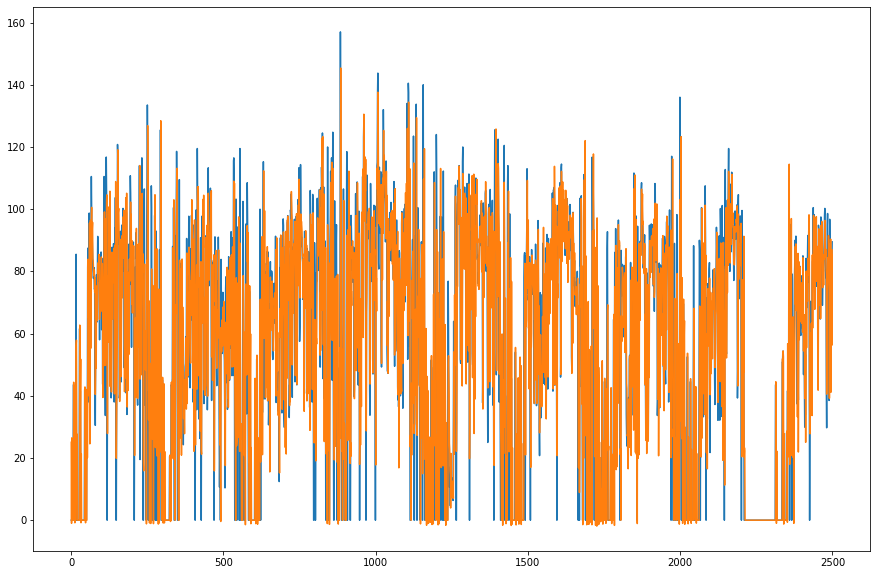

In [54]:

plt.figure(figsize=(15,10))
plt.plot(test)
plt.plot(predictions)


In [22]:
#Calculating Root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(test, predictions))

23.407942087840116

In [23]:
#Calculating mean absolute error
from sklearn.metrics import mean_absolute_error
import numpy as np

mean_absolute_error(test, predictions, multioutput='raw_values')

array([16.85082361])

In [24]:
#Calculating mean absolute percentage error
def mean_absolute_percentage_error(test, predictions):
    
  MAPE = []

  for i in range(len(test)):
    x = test[i]
    y = predictions[i]
    if x == 0:
      pass
    else:
      MAPE.append(np.abs((x-y)/x) * 100)
  return np.mean(MAPE)
  

mean_absolute_percentage_error(test, predictions)

30.9088105696621

In [25]:
#Calculating absolute percentage error greater than 10%
def mean_absolute_percentage_error1(test, predictions):
    
  MAPE0 = []
  

  for i in range(len(test)):
    x = test[i]
    y = predictions[i]
    if x == 0:
      pass
    else:
      B = np.abs((x-y)/x) * 100
      if B >10:
        MAPE0.append(B)


  return ((len(MAPE0)/3400)*100)
print(mean_absolute_percentage_error1(test, predictions))

38.029411764705884


In [45]:
from sklearn.preprocessing import StandardScaler
# standardizing the data
ee_arr = fcd.values

std_scaler = StandardScaler()
std_scaler = std_scaler.fit(ee_arr.reshape(-1, 1))

print(std_scaler.mean_)
print(std_scaler.var_)

std_ee1 = std_scaler.transform(ee_arr.reshape(-1, 1))
print(std_ee1[5])

#creating test and train data
X = std_ee1
size = int(len(X) * 0.75)
std_ee1_train, std_ee1_test = X[0:size], X[size:len(X)]
history = [x for x in train]

#fitting the data
std_ee1_arima = ARIMA(std_ee1_train,order=(2,1,0))
std_ee1_arima_fit = std_ee1_arima.fit()

#forecasting the data
std_ee1_forecast = std_ee1_arima_fit.forecast(steps=2500)[0]
print(std_ee1_forecast)

print(std_ee1_test)

#reversing the normalized forecasting to original
std_ee1_forecast_reverse = std_scaler.inverse_transform(std_ee1_forecast)
print(std_ee1_forecast_reverse)

#reversing the normalized test data to original
std_ee1_test_reverse = std_scaler.inverse_transform(std_ee1_test)
print(std_ee1_test_reverse)

[56.42996852]
[1387.91944196]
[-1.51470367]
[-0.84230021 -0.85600221 -0.49136535 ... -0.30528915 -0.30516816
 -0.30504716]
[[-1.51470367]
 [-1.51470367]
 [-1.51470367]
 ...
 [ 0.56377621]
 [ 0.70872401]
 [ 0.88767191]]
[25.05025041 24.53978516 38.12425499 ... 45.05648512 45.06099272
 45.06550033]
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 ...
 [77.43333333]
 [82.83333333]
 [89.5       ]]


In [44]:
std_ee1_train

array([ 0. ,  0. ,  0. , ...,  0. , 51.5, 51.5])

In [46]:
np.sqrt(mean_squared_error(std_ee1_test_reverse,std_ee1_forecast_reverse))

40.92134923148322

In [47]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mean_absolute_error(std_ee1_test_reverse,std_ee1_forecast_reverse, multioutput='raw_values')

array([35.40312534])

In [55]:
def mean_absolute_percentage_error(test, predictions):
    
  MAPE = []

  for i in range(len(test)):
    x = test[i]
    y = predictions[i]
    if x == 0:
      pass
    else:
      MAPE.append(np.abs((x-y)/x) * 100)
  return np.mean(MAPE)
  

print(mean_absolute_percentage_error(test, predictions))

30.9088105696621


In [49]:
def mean_absolute_percentage_error1(std_ee1_test_reverse,std_ee1_forecast_reverse):
    
  MAPE1 = []
  

  for i in range(len(std_ee1_test_reverse)):
    x = std_ee1_test_reverse[i]
    y = std_ee1_forecast_reverse[i]
    if x == 0:
      pass
    else:
      F = np.abs((x-y)/x) * 100
      if F >10:
        MAPE1.append(F)


  return ((len(MAPE1)/2500)*100)
print(mean_absolute_percentage_error1(std_ee1_test_reverse,std_ee1_forecast_reverse))

71.12
